# Simple plot
This jupyter notebook shows how to download data from GOES-16 and make a simple plot using the **GOES** package.

Import the packages.

In [7]:
import GOES as GOES
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr

# import cartopy.crs as ccrs
import numpy as np
# from cartopy.feature import NaturalEarthFeature

Downloads the file.

In [2]:
flist = GOES.download('goes16', 'ABI-L2-ACHAF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200101-153000', DateTimeFin = '20200101-155000', 
#                       channel = ['13'],
                      path_out='./data/')

flist_cod = GOES.download('goes16', 'ABI-L2-CODF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200101-153000', DateTimeFin = '20200101-155000', 
#                       channel = ['13'],
                      path_out='./data/')

Files:
  OR_ABI-L2-ACHAF-M6_G16_s20200011530217_e20200011539525_c20200011541391.nc 100% 1.5MB 1s
  OR_ABI-L2-ACHAF-M6_G16_s20200011540217_e20200011549525_c20200011551340.nc 100% 1.5MB 1s
Files:
  OR_ABI-L2-CODF-M6_G16_s20200011530217_e20200011539525_c20200011541483.nc 100% 7.4MB 3s
  OR_ABI-L2-CODF-M6_G16_s20200011540217_e20200011549525_c20200011551394.nc 100% 7.4MB 3s


Set the path and name of file that we will use. In this case that information is in flist.

In [3]:
file = flist[0]
file_cod = flist_cod[0]


Gets data from file.

In [4]:
# def readFile(file, visualise = True):
#     ds_nc = nc.Dataset(file)
#     var_name = list(ds_nc.variables.keys())[0]
#     print(var_name)

#     # set the map domain
#     domain = [-50.0,-30.0,-5.0,15.0] #->  (x0, x1, y0, y1) 

#     # reads the file
#     ds = GOES.open_dataset(file)

#     # get image with the coordinates of corners of their pixels
#     var, LonCor, LatCor = ds.image(var_name, lonlat='corner', domain=domain)

#     # get information about data
#     sat = ds.attribute('platform_ID')
#     unit = ds_nc.variables[var_name].units
    
#     if visualise:
#         # band = ds.variable('band_id').data[0]
#         # fig, ax = plt.figure()
#         plt.imshow(var.data)
#         plt.colorbar()

#         plt.show()

#         plt.hist(var.data.flatten())
#         plt.xlabel(f'{var_name} ({unit})')
#         plt.show()
#     return ds, var, LonCor, LatCor
    
# ds_cth, cth, LonCor, LatCor = readFile(file, visualise = False)
# ds_cod, cod, __, __ = readFile(file_cod, visualise = False)


COD


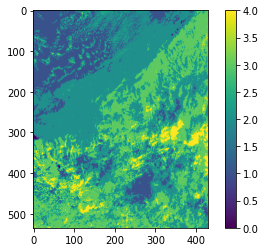

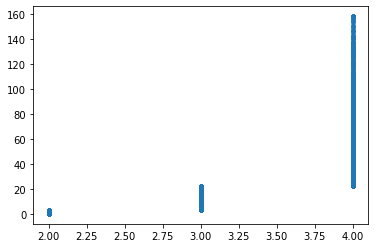

array([0, 1, 2, 3, 4])

In [5]:
# get data
ds_nc = nc.Dataset(file_cod)
var_name = list(ds_nc.variables.keys())[0]
print(var_name)

# set the map domain
domain = [-50.0,-30.0,-5.0,15.0] #->  (x0, x1, y0, y1) 

# reads the file
ds_cod = GOES.open_dataset(file_cod)
ds_cth = GOES.open_dataset(file)

# get image with the coordinates of corners of their pixels
cod, LonCor, LatCor = ds_cod.image('COD', lonlat='corner', domain=domain)
dqf_cod, LonCor, LatCor = ds_cod.image('DQF', lonlat='corner', domain=domain)
cth, LonCor, LatCor = ds_cth.image('HT', lonlat='corner', domain=domain)
dqf_cth, LonCor, LatCor = ds_cth.image('DQF', lonlat='corner', domain=domain)

# cloud type
ct = np.where(dqf_cod.data == 6, 1, # clear sky # should we also use dqf_cth = 4 here?
              np.where(dqf_cod.data != 0, 0, # non valid data
                       np.where(cod.data < 3.6, 2,
                                np.where(cod.data< 23, 3, 4))))

# ct = np.where(dqf_cod.data == 6, 1, # clear sky # should we also use dqf_cth = 4 here?
#               np.where(dqf_cod.data != 0, 0, # non valid data
#                        np.where(cod.data < 3.6, 
#                                 np.where(cth.data<2e3, 2,
#                                         np.where(cth.data< 8e3, 3, 4)),
#                        np.where(cod.data< 23, 
#                                 np.where(cth.data<2e3, 5,
#                                         np.where(cth.data< 8e3, 6, 7)
#                                         ), 8
#                                )
#                                )
#                       )
#              )

# clearsky
ct
plt.imshow(ct)
plt.colorbar()
plt.show()

plt.plot(ct.flatten(), cod.data.flatten(), '.')
plt.show()
np.unique(ct)

In [6]:
dsi = cth.interp(x=cod.x, y=cod.y)


AttributeError: 'GOES' object has no attribute 'interp'

In [262]:
cth

<class 'GOES.processing.processing_data.GOES'>

Keys:
   long_name                     : ABI L2+ Cloud Top Height
   standard_name                 : geopotential_height_at_cloud_top
   units                         : m
   undef                         : nan
   axis                          : YX
   dimensions                    : (y, x)
   t                             <class 'GOES.processing.processing_data.GOES'>
   time_bounds                   <class 'GOES.processing.processing_data.GOES'>
   pixels_limits                 (4) int64
   data                          (214, 172) float32

In [263]:
# +> not the same resolution

# Filter based on quality

ds_nc = nc.Dataset(file_cod)
var_name = list(ds_nc.variables.keys())[0]
print(var_name)

# set the map domain
domain = [-50.0,-30.0,-5.0,15.0] #->  (x0, x1, y0, y1) 

# reads the file
ds = GOES.open_dataset(file_cod)

# get image with the coordinates of corners of their pixels
var, LonCor, LatCor = ds.image('DQF', lonlat='corner', domain=domain)

# get information about data
sat = ds.attribute('platform_ID')
unit = ds_nc.variables[var_name].units


# band = ds.variable('band_id').data[0]
# fig, ax = plt.figure()
plt.imshow(var.data == 0)
plt.colorbar()

plt.show()

plt.hist(var.data.flatten())
plt.xlabel(f'{var_name} ({unit})')
plt.show()

In [184]:
ds_nc.variables['x']

<class 'netCDF4._netCDF4.Variable'>
int16 x(x)
    scale_factor: 0.000112
    add_offset: -0.151816
    units: rad
    axis: X
    long_name: GOES Projection x-Coordinate
    standard_name: projection_x_coordinate
unlimited dimensions: 
current shape = (2712,)
filling on, default _FillValue of -32767 used

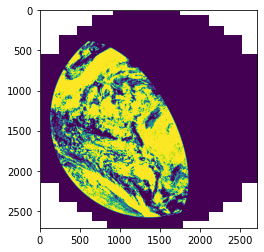

In [180]:
# mask = (ds_nc.variables['DQF'][:] != 0)
plt.imshow(ds_nc.variables['DQF'][:]==0)
# mask.data

In [1]:
# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75]) # [left, bottom, width, height] 

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=plt.cm.Greys)

# add the colorbar
cb = plt.colorbar(img, orientation='horizontal', extend='both', cax=fig.add_axes([0.12, 0.05, 0.76, 0.02]))

# set the title
ax.set_title('{}'.format(sat), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0], fontsize=7, loc='right')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]])

plt.show()

NameError: name 'domain' is not defined

Creates plot.

In [30]:
# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
ax.outline_patch.set_linewidth(0.3)

# # add the geographic boundaries
# l = NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
# l
# ax.add_feature(l, edgecolor='gold', linewidth=0.25)
# ax.coastlines(color = 'gold')

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=plt.cm.Greys, transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, orientation='horizontal', extend='both', cax=fig.add_axes([0.12, 0.2, 0.76, 0.02]))

# set the title
ax.set_title('{} - C{}'.format(sat, band), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0], fontsize=7, loc='right')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())

plt.show()

NameError: name 'ccrs' is not defined

<Figure size 800x800 with 0 Axes>

<class 'GOES.processing.processing_data.open_dataset'>

attribute:
   naming_authority              : gov.nesdis.noaa
   Conventions                   : CF-1.7
   Metadata_Conventions          : Unidata Dataset Discovery v1.0
   standard_name_vocabulary      : CF Standard Name Table (v35, 20 July 2016)
   institution                   : DOC/NOAA/NESDIS > U.S. Department of Commerce, N...
   project                       : GOES
   production_site               : NSOF
   production_environment        : OE
   spatial_resolution            : 4km at nadir
   orbital_slot                  : GOES-East
   platform_ID                   : G16
   instrument_type               : GOES R Series Advanced Baseline Imager
   scene_id                      : Full Disk
   instrument_ID                 : FM1
   dataset_name                  : OR_ABI-L2-CODF-M6_G16_s20200011530217_e202000115...
   iso_series_metadata_id        : 49b3d350-afec-11e1-afa6-0800200c9a66
   title                         : ABI L2 